In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

Using CPU. Note: This module is much faster with a GPU.


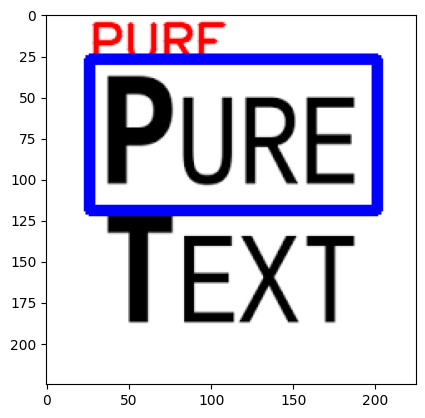

In [2]:
img_path='text.png'
reader=easyocr.Reader(['en'],gpu=False)
result=reader.readtext(img_path)
result

len(result)

top_left=result[0][0][0]
bottom_left=result[0][0][1]
top_right=result[0][0][3]
bottom_right=result[0][0][2]
text=result[0][1]
font=cv2.FONT_HERSHEY_SIMPLEX

img=cv2.imread(img_path)
img=cv2.rectangle(img,(top_left),(bottom_right),(0,255,0),5)
img=cv2.putText(img,text,(top_left),font,1,(255,0,0),2,cv2.LINE_AA)
plt.imshow(img)

img1=cv2.rectangle(img,(bottom_left),(top_right),(0,0,255),5)
plt.imshow(img1)

# cap=cv2.VideoCapture(0)
# cap.set(3,720)
# cap.set(4,480)
# ctime=0
# ptime=0
# while cap.isOpened():
#     success,frame=cap.read()
#     x,y,_=frame.shape
#     # frame=frame[]
#     gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     # if reader.recognize(gray_frame):
#     if reader.readtext(frame):
#         # results=reader.readtext(frame)
#         for i,result in enumerate(reader.readtext(frame)):
#             # top_left=result[0][0][0]
#             # bottom_right=result[0][0][2]
#             text=result[i][1]
#         cv2.putText(frame,text,top_left,cv2.FONT_HERSHEY_PLAIN,2, color=(255,0,0))
    
#     ctime=time.time()
#     fps=1/(ctime-ptime)
#     ptime=ctime
    
#     cv2.putText(frame,str(fps),(50,50),cv2.FONT_HERSHEY_PLAIN,2, color=(255,0,0))
#     cv2.imshow('text detection',frame)
#     if cv2.waitKey(1) & 0XFF==ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [3]:
import gradio as gr
from transformers import pipeline

In [4]:
translation_en=pipeline('translation_en_to_de')

No model was supplied, defaulted to google-t5/t5-base and revision 686f1db (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\PCR\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
results=translation_en('I love you')
results

[{'translation_text': 'Ich liebe Sie'}]

In [6]:
translation_ur=pipeline("translation", model="Helsinki-NLP/opus-mt-en-ur")

C:\Users\PCR\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [7]:
def translation_transformers(text,language):
    if 'ur'==language:
        results=translation_ur(text)
    if 'de'==language:
        results=translation_de(text)
    if 'ja'==language:
        results=translation_ja(text)
    return results[0]['translation_text']

In [8]:
translation_transformers('I love you','ur')

'میں تم سے محبت کرتا ہوں'

In [9]:
# texts=[]
# text=' '
# for result in reader.readtext('download.png'):
#     txt=result[1]
#     # text=str(text)
#     # texts.append(text)
# # for i in filters:
#     texts=txt+text
#     text=texts
# print(texts)
# texts=str(texts)

# for i in texts:
# text.replace('[','')
    # texts[i].split(',',' ')
# texts
# for i in translation_transformers(texts,'ur'):
    # print(i)
# for i in result:
# translation_transformers(texts,'ur')

# filters='[]!"#$%&()*+,- ./:;<=>?@^_`{|}~\t\n?'
# filter_text=
# def filtering_text(texts):
# for filter in filters:
#     # for i in filter:
#     for txt in texts:
#         print(txt)
#         break
#         if i == txt:
#             text=texts.replace(i,' ')
#         else:
#             pass
#             # texts=txt
#     print(text)
        # break
        # print(type(i))
    # return text
# filtering_text(texts)

# filters="[]!#$%&()*+,-./:;<=>?@^_`{|}'~\t\n?"
# for filter in filters:
#     filter_text=texts.replace(filter,' ')
#     # if filter==' ':
#             # filter_text=texts.replace(filter,'')
#     if filter_text!=texts:
#         texts=filter_text
#         if filter=='  ':
#             filter_text=texts.replace(filter,' ')
#     else:
#         filter_text=texts
#     print(filter_text)
# print(str(filter_text)
# '  'times  it

In [10]:
def filtering_text_to_text(img_path,text_to_filter=True):
    text=' '
    for result in reader.readtext(img_path):
        txt=result[1]+' '
        # print(txt)
        texts=text+txt
        text=texts
    if text_to_filter:
        filters="!#$%&*+-/;<=>@^_`|'~\t\n?"
        for filter in filters:
            filter_text=text.replace(filter,' ')
            # if filter==' ':
                    # filter_text=texts.replace(filter,'')
            if filter_text!=text:
                text=filter_text
                if filter=='  ':
                    filter_text=text.replace(filter,' ')
            else:
                filter_text=text
    text=str(text)
    return text
filtering_text_to_text('download.png')

' It was the best of times, it was the worst of times, it was the age of wisdom  it was the age of foolishness  '

In [11]:
texts=[]
for result in reader.readtext('download.png'):
    text=result[1]
    text=str(text)
    texts.append(text)
# for i in filters:
    # print(i)
texts=str(texts)

In [12]:
translation_transformers(texts,'ur')

'ان کے لئے بہترین وقت تھا، جب کہ یہ تھا کہ، "دراصل"، یہ واقعی بیوقوفی کی بات تھی"'

In [13]:
import re
# from tensorflow.keras.preprocessing import text
# text()
texts=re.sub(r'def\s+([a-zA-Z_][a-zA-Z_0-9]*)\s*\(\s*\):',
        ' ',
        f'{texts}'
       )

In [14]:
texts

"['It was the best of', 'times, it was the worst', 'of times, it was the age', 'of wisdom; it was the', 'age of foolishness_']"

In [15]:
interface=gr.Interface(fn=translation_transformers,
                       inputs=gr.Textbox(lines=2,placeholder='Text to Translate'),
                       outputs='text')

C:\Users\PCR\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\utils.py:1002: UserWarning: Expected 2 arguments for function <function translation_transformers at 0x0000022738C7D9E0>, received 1.
  warnings.warn(
C:\Users\PCR\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\utils.py:1006: UserWarning: Expected at least 2 arguments for function <function translation_transformers at 0x0000022738C7D9E0>, received 1.
  warnings.warn(


In [16]:
# interface.input_components.append(2)
interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [17]:
# Use a pipeline as a high-level helper
# from transformers import pipeline

translation_ja = pipeline("translation", model="Helsinki-NLP/opus-tatoeba-en-ja")

C:\Users\PCR\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
C:\Users\PCR\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [18]:
translation_transformers(texts,'ja')

'2019年2月25日閲覧. ^ "[[[『時』,『時』,『時』,『時代』,『知恵』,『愚行』,『時』は『年』,『年』,"愚行』であつた. ^ a b c d e f g h i j k h i j k h i j k h i j k h i j k h i j.'

In [19]:
reader.readtext('download.png',allowlist=False)

[([[4, 6], [218, 6], [218, 36], [4, 36]],
  'It was the best of',
  0.7971562017218529),
 ([[3, 40], [276, 40], [276, 70], [3, 70]],
  'times, it was the worst',
  0.7649300445572378),
 ([[3, 73], [281, 73], [281, 109], [3, 109]],
  'of times, it was the age',
  0.9663759639876809),
 ([[3, 103], [263, 103], [263, 139], [3, 139]],
  'of wisdom; it was the',
  0.8666285311561782),
 ([[3, 137], [229, 137], [229, 175], [3, 175]],
  'age of foolishness_',
  0.9592305650963302)]

In [20]:
reader=easyocr.Reader(['en'],gpu=False,)

Using CPU. Note: This module is much faster with a GPU.


In [32]:
cap=cv2.VideoCapture(0)
w,h=720,480
cap.set(3, w)
cap.set(4, h)

language_to_translate='ur'
top_left=(100,100)
top_right=(w-100,h-100)
iterable=0
ctime=0
ptime=0

while cap.isOpened():
    success,frame=cap.read()
    # x,y,_=frame.shape
    # frame=frame[]
    # gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    # if reader.recognize(gray_frame):
    if reader.readtext(frame):
        text=' '
        for result in reader.readtext(frame):
            txt=result[1]+' '
            # print(txt)
            texts=text+txt
            text=texts
        filters="!#$%&*+-/;<=>@^_`|'~\t\n?"
        for filter in filters:
            filter_text=text.replace(filter,' ')
            if filter_text!=text:
                text=filter_text
                if filter=='  ':
                    filter_text=text.replace(filter,' ')
            else:
                filter_text=text
        text=str(text)
        
        # for result in reader.readtext(frame):
        # print(results,type(results))
        # break
        translated_text=translation_transformers(text,language_to_translate)
        print(translated_text)
        # cv2.putText(frame,translated_text,top_left,cv2.FONT_HERSHEY_DUPLEX,2, (255,0,0) , 5)
        # iterable+=iterable
    # ctime=time.time()
    # fps=1/(ctime-ptime)
    # ptime=ctime
    
    # cv2.putText(frame,str(fps),(50,50),cv2.FONT_HERSHEY_PLAIN,2, color=(255,0,0))
    cv2.imshow('text detection',frame)
    if cv2.waitKey(1) & 0XFF==ord('q'):
        break
print(translated_text)
# print(top_left,bottom_right,texts)
cap.release()
cv2.destroyAllWindows()

اِن سوالوں کا جواب اگلے مضمون میں دیا جائے گا ۔
یو . ایس . اے .
اِس کی کیا وجہ ہے ؟
پاکستان میں نو سال کی مدت کے بعد چین کے مردوں میں خانہ آباد ہو گیا۔
پاکستان کے ۳۲ سالوں کی دہائی
سن ۳۲ سال کے آخر میں کینیڈا کے ایک اخبار میں لکھا تھا : ” مَیں نے اپنی زندگی میں بہت سی تبدیلیاں کی ہیں ۔
اِن سوالوں کا جواب اگلے مضمون میں دیا جائے گا ۔
اِن سوالوں کا جواب اگلے مضمون میں دیا جائے گا ۔


In [22]:
%who

bottom_left	 bottom_right	 cap	 ctime	 cv2	 easyocr	 filter	 filter_text	 filtering_text_to_text	 
filters	 font	 frame	 gr	 h	 img	 img1	 img_path	 interface	 
iterable	 language_to_translate	 np	 pipeline	 plt	 ptime	 re	 reader	 result	 
results	 success	 text	 texts	 time	 top_left	 top_right	 translated_text	 translation_en	 
translation_ja	 translation_transformers	 translation_ur	 txt	 w	 


In [28]:
# reader.readtext(frame)
def translation_transformers(text,language):
    if 'ur'==language:
        results=translation_ur(text)
    if 'de'==language:
        results=translation_de(text)
    if 'ja'==language:
        results=translation_ja(text)
    return results[0]['translation_text']

def image_to_text_with_translation(img_path,language_to_translate='ur',filtering_text=True):
    text=' '
    for result in reader.readtext(img_path):
        txt=result[1]+' '
        # print(txt)
        texts=text+txt
        text=texts
    if filtering_text:
        filters="!#$%&*+-/;<=>@^_`|'~\t\n?"
        for filter in filters:
            filter_text=text.replace(filter,' ')
            if filter_text!=text:
                text=filter_text
                if filter=='  ':
                    filter_text=text.replace(filter,' ')
            else:
                filter_text=text
            text=str(text)
    else:
        text=str(text)
    translated_text=translation_transformers(text,language_to_translate)
    return translated_text
# img=cv2.imread('download.png')
# img1=cv2.putText(img,translated_text,top_left,cv2.FONT_HERSHEY_PLAIN,2, (255,0,0) , 5)
# plt.imshow(img1)

In [29]:
image_to_text_with_translation('download.png','ja')

'それは最も良い時代であり、最悪の時代であり、 知恵の時代であった それは愚かな時代であった'